        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

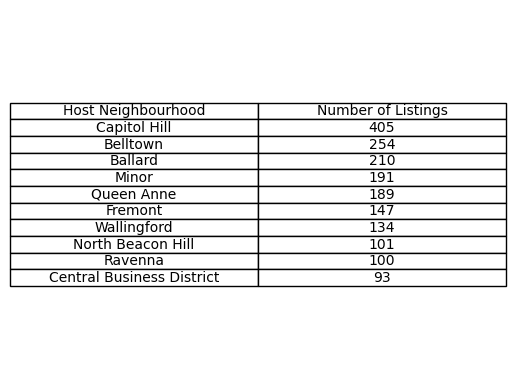

C:\Users\MantenguN\AppData\Local\Temp\ipykernel_68456\3159096079.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


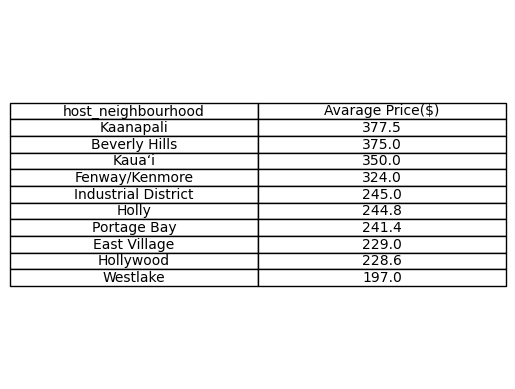

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  

C:\Users\MantenguN\AppData\Local\Temp\ipykernel_68456\3159096079.py:63: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float) # Removing '$' and ',' so we can convert to float


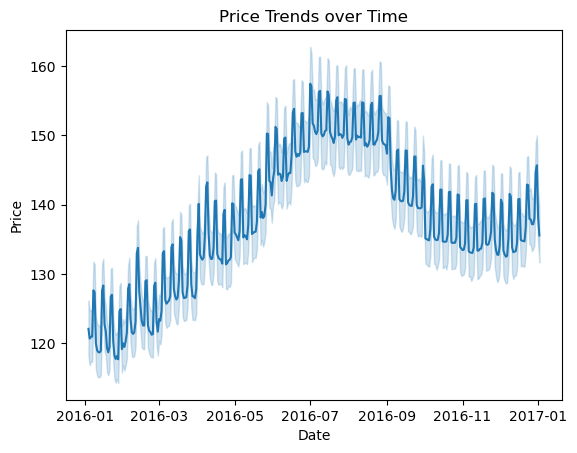

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')

# Eploring listings data
# ---------------------
print(df_listings.head()) # Getting a glimpse of the data

# Q1: What is the top 10 neighborhoods with the highest number of listings?
neighborhood_counts = df_listings['host_neighbourhood'].value_counts() # Group the data by neighborhood and count the number of listings in each neighborhood 

df = neighborhood_counts.to_frame()
df = df.rename(columns={'host_neighbourhood': 'Number of Listings'})
df = df.reset_index().rename(columns={'index': 'Host Neighbourhood'})

# Showing the 10 neighborhoods with the highest number of listings 
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=df.head(10).values, colLabels=df.columns, loc='center', cellLoc='center')
plt.show() 

# Q2: What is the average price per neighborhoods?
df  = df_listings
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype(float)  # Replace the dollar sign in a specific column
neighborhood_prices = round(df.groupby('host_neighbourhood')['price'].mean(), 1) # Group the data by neighborhood and calculate the average price for each neighborhood
sorted_neighborhoods = neighborhood_prices.sort_values(ascending=False) # Sort the neighborhoods by average price in descending order

sorted_neighborhoods = sorted_neighborhoods.to_frame()
sorted_neighborhoods = sorted_neighborhoods.rename(columns={'price': 'Avarage Price($)'})
sorted_neighborhoods = sorted_neighborhoods.reset_index().rename(columns={'index': 'Host Neighbourhood'})

# Showing the top 10 most expensive neighborhoods of average
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=sorted_neighborhoods.head(10).values, colLabels=sorted_neighborhoods.columns, loc='center', cellLoc='center')
plt.show() 

# Eploring reviews data
# ---------------------
# Q1: Are there any reviewers with more than one review?
print(df_reviews.head()) #  Getting a glimpse of the data
print(df_reviews.info()) # Getting information about the columns, data types, and missing values

duplicates = df_reviews.duplicated(subset=['reviewer_name', 'reviewer_id']).sum() # Clculating the sum of duplicates per reviewer
print("Number of reviews is", df_reviews.shape[0],"and the number of reviewers with more that one review is", duplicates,". Based on reviews, this means that",(duplicates/df_reviews.shape[0])*100,"percent of people use Seattle Airbnb more than once.")
    
# Exploring calendar data
# -----------------------
# Q1: What is the price trends of time?
print(df_calendar.head()) # Getting a glimpse of the data
print(df_calendar.info()) # Getting information about the columns, data types, and missing values

df = df_calendar
df.dropna(subset=['price'], inplace=True) # Removing NaNs

df['date'] = pd.to_datetime(df['date']) # Coverting date to datetime
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float) # Removing '$' and ',' so we can convert to float

# Plotting price trends of time
sns.lineplot(x='date', y='price', data=df)
plt.title('Price Trends over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


